In [42]:
import json
import os
import plotly.io as pio
import plotly.graph_objects as go


In [160]:
results_path=os.listdir('Files')[:-2]
results_list=[]
for i in os.listdir('Files')[:-2]:
    tmp=i.split('_')
    last_part = tmp[-1].split('.')[0]
    numbers = tmp[1:-1] + [last_part]
    results_list.append(numbers)

In [163]:
d_n_d_r={}
for i in range(len(results_list)):
    cur_tuple=results_list[i][0],results_list[i][1],results_list[i][2]
    if cur_tuple not in d_n_d_r:
        d_n_d_r[cur_tuple]=[results_path[i]]
    else:
         d_n_d_r[cur_tuple].append(results_path[i])

In [215]:
d_n_d_m={}
for i in range(len(results_list)):
    cur_tuple=results_list[i][0],results_list[i][2],results_list[i][3]
    if cur_tuple not in d_n_d_m:
        d_n_d_m[cur_tuple]=[results_path[i]]
    else:
         d_n_d_m[cur_tuple].append(results_path[i])

In [169]:
import json
import plotly.graph_objects as go

# Assuming 'd' is defined elsewhere in your code
d=d_n_d_r
html_list = []
for k in d: 

    fig = go.Figure()

    for file_name in d[k]:
        with open(fr'Files\{file_name}', 'r') as file:
            data = json.load(file)
            data = list(data.values())
            trace_name = file_name.split('.')[0]  
            reward = trace_name.split("_")[2]
            model = trace_name.split("_")[-1]
            n = trace_name.split("_")[1]
            distance=trace_name.split("_")[3]
            r_type = 'trivial' if reward == '0' else 'euclidian' if reward == '1' else 'BWAS' if reward == '2' else 'heuristics'
            model_type = 'AC' if model == '0' else 'Dueling AC'
            trace_legend = f'Model type: {model_type}'
            fig.add_trace(go.Scatter(y=data, mode='lines', name=trace_legend))

    # Adding custom annotations for the x-axis
    annotations = [
        dict(
            x=2.5,
            y=-0.1,
            xref='x',
            yref='paper',
            text='2 steps from goal',
            showarrow=False,
            font=dict(size=10),
            align='center'
        ),
        dict(
            x=7.5,
            y=-0.1,
            xref='x',
            yref='paper',
            text='4 steps from goal',
            showarrow=False,
            font=dict(size=10),
            align='center'
        ),
            dict(
            x=12.5,
            y=-0.1,
            xref='x',
            yref='paper',
            text='6 steps from goal',
            showarrow=False,
            font=dict(size=10),
            align='center'
        ),
          dict(
            x=17.5,
            y=-0.1,
            xref='x',
            yref='paper',
            text='8 steps from goal',
            showarrow=False,
            font=dict(size=10),
            align='center'
        ),
                  dict(
            x=22.5,
            y=-0.1,
            xref='x',
            yref='paper',
            text='10 steps from goal',
            showarrow=False,
            font=dict(size=10),
            align='center'
        ),
                  dict(
            x=27.5,
            y=-0.1,
            xref='x',
            yref='paper',
            text='15 steps from goal',
            showarrow=False,
            font=dict(size=10),
            align='center'
        ),
        # Add more annotations as needed
    ]

    fig.update_layout(
        title=f"Result for n={n} and train distance {distance}, Reward type: {r_type}",
        xaxis_title="Index",
        yaxis_title="Value",
        annotations=annotations,
        width=1000,
        height=400
    )
    html_list.append(pio.to_html(fig))
    fig.show()

all_html = '\n'.join(html_list)
with open(f"reward_different_model.html", "w", encoding="utf-8") as file:
    file.write(all_html)


In [281]:
import pandas as pd
df_=pd.DataFrame(columns=['state','N', 'Reward_type', 'distance','model_Type', 'reward'])
for file_name in results_path:
    file_name = file_name.split('.')[0]  
    n = file_name.split("_")[1]
    reward = file_name.split("_")[2]
    distance=file_name.split("_")[3]
    model = file_name.split("_")[4]
    with open(fr'Files\{file_name}.json', 'r') as file:
            data = json.load(file)
    for k,v in data.items():
        new_row = {'state': k, 'N': n, 'Reward_type': reward,'distance':distance,'model_Type':model,'reward':v}
        df_.loc[len(df_)] = new_row

df_
    
    

,state,N,Reward_type,distance,model_Type,reward
0,0,5,0,10,0,100
1,1,5,0,10,0,1
2,2,5,0,10,0,2
3,3,5,0,10,0,100
4,4,5,0,10,0,80
...,...,...,...,...,...,...
1435,25,7,3,8,1,100
1436,26,7,3,8,1,100
1437,27,7,3,8,1,100
1438,28,7,3,8,1,100


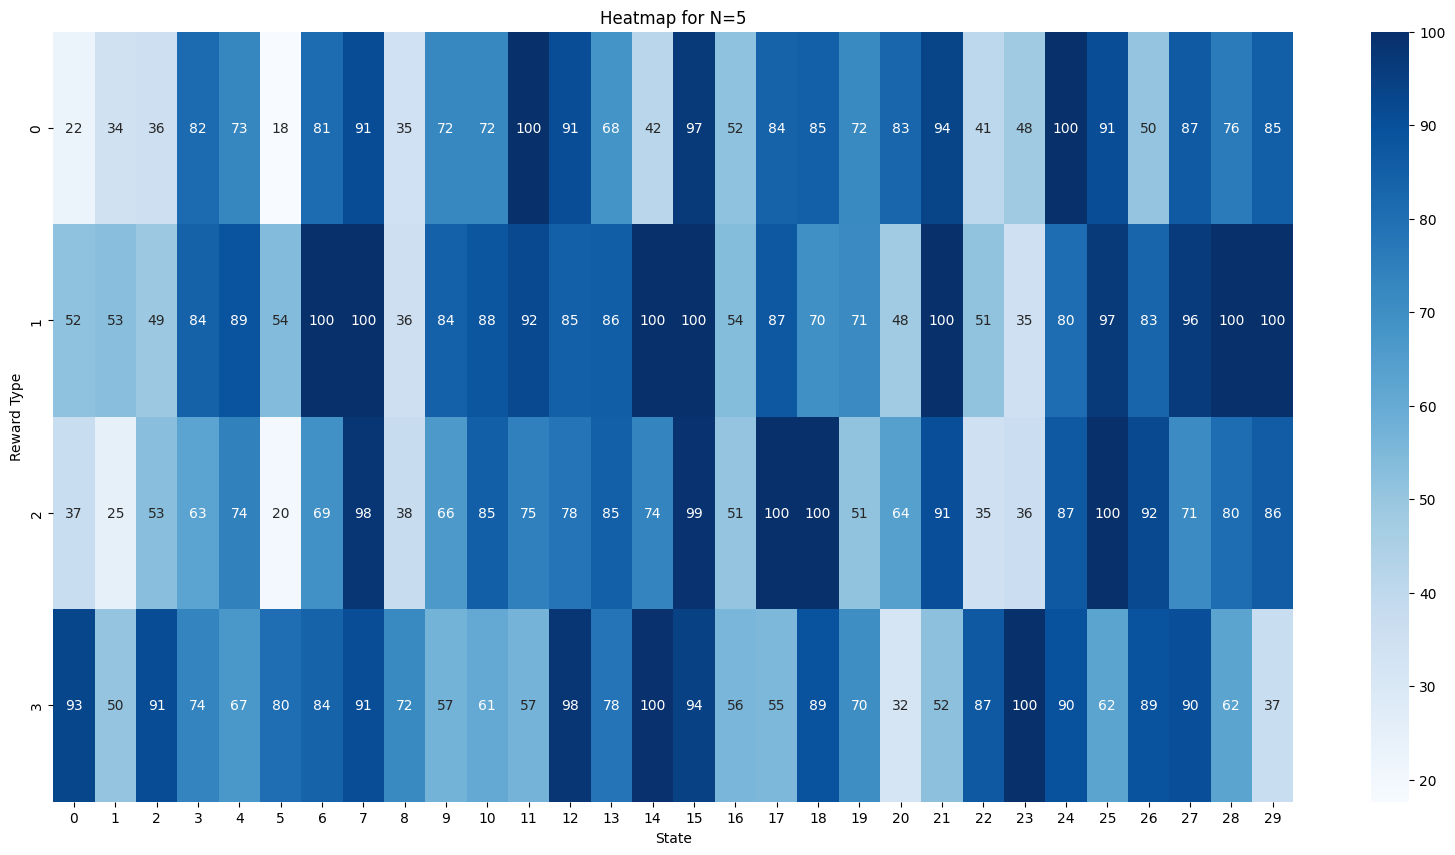

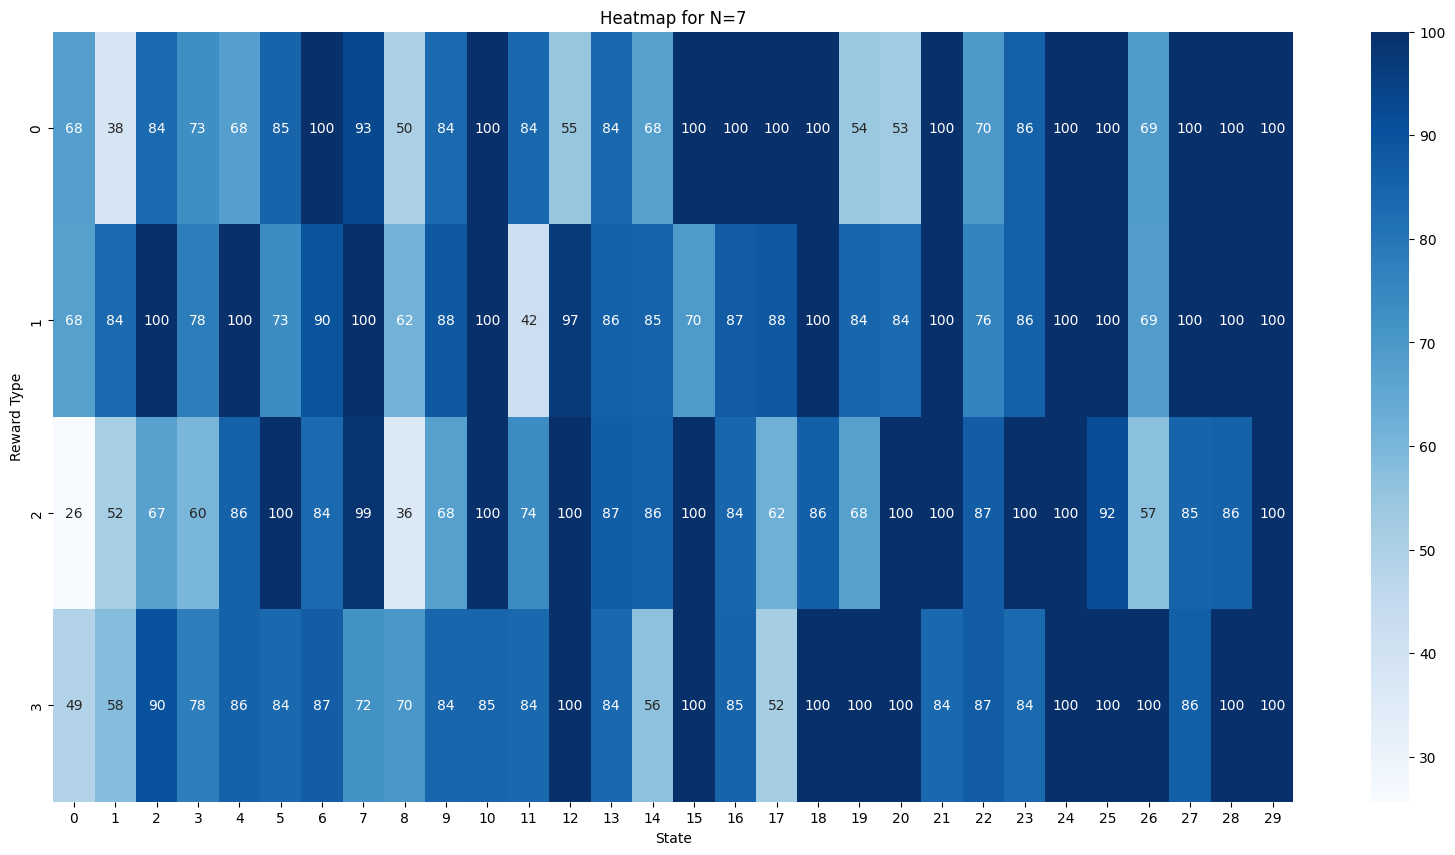

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

df=df_
df['state'] = df['state'].astype(int)

unique_combinations = df[['N']].drop_duplicates()

for _, row in unique_combinations.iterrows():
    n = row['N']
    
    subset_df = df[(df['N'] == n)]
    
    grouped_df = subset_df.groupby(['state', 'Reward_type'], as_index=False)['reward'].mean()
    
    grouped_df = grouped_df.sort_values(by='state')
    
    pivot_df = grouped_df.pivot(index='Reward_type', columns='state', values='reward')
    
    plt.figure(figsize=(20, 10))
    sns.heatmap(pivot_df, annot=True, cmap="Blues", fmt=".0f")
    plt.title(f'Heatmap for N={n}')
    plt.xlabel('State')
    plt.ylabel('Reward Type')
    plt.show()


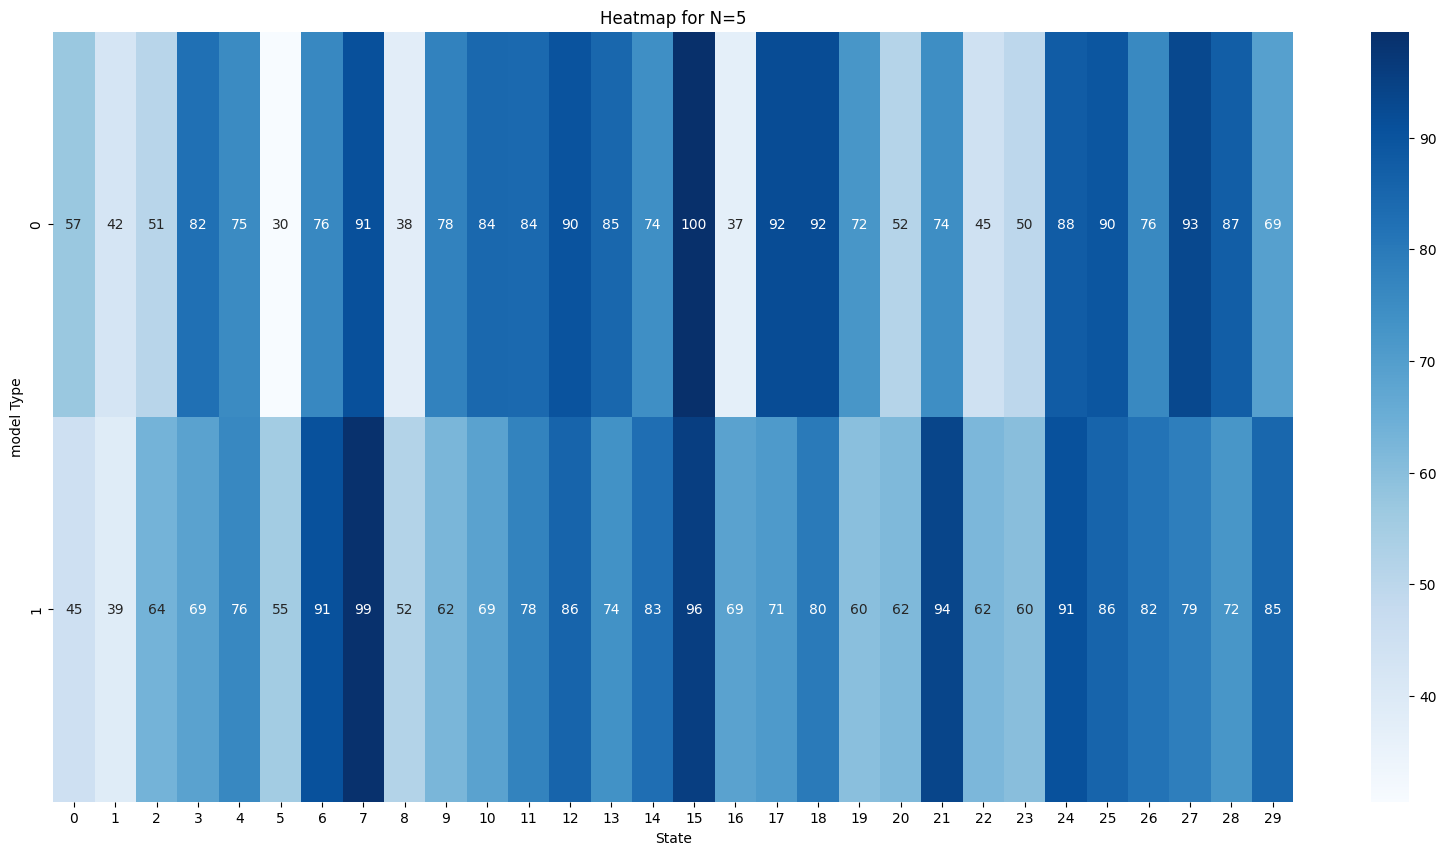

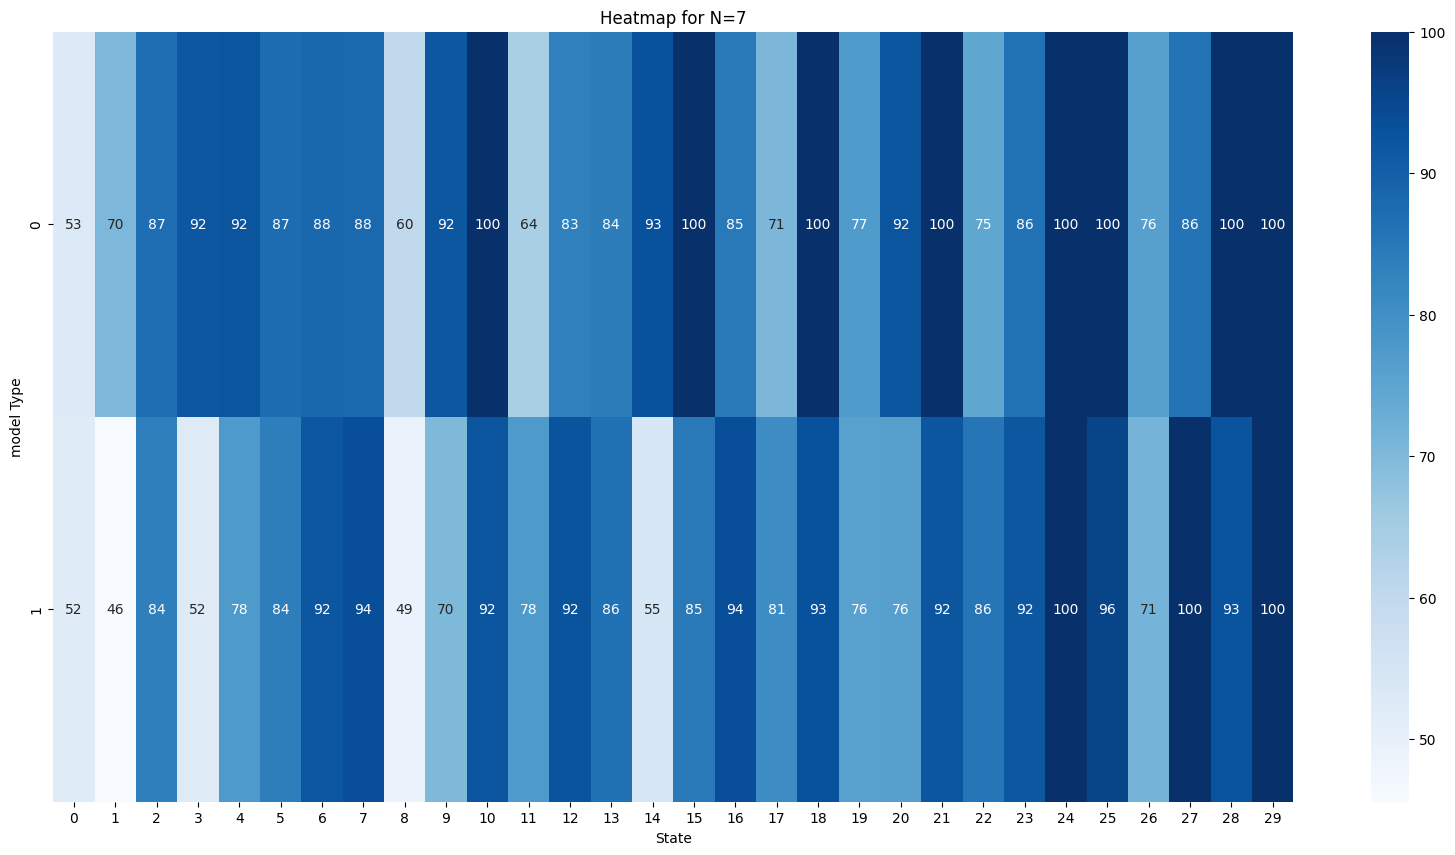

In [276]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df=df_

df['state'] = df['state'].astype(int)

unique_combinations = df[['N']].drop_duplicates()

for _, row in unique_combinations.iterrows():
    n = row['N']
    
    subset_df = df[(df['N'] == n)]
    
    grouped_df = subset_df.groupby(['state', 'model_Type'], as_index=False)['reward'].mean()
    
    grouped_df = grouped_df.sort_values(by='state')
    
    pivot_df = grouped_df.pivot(index='model_Type', columns='state', values='reward')
    
    plt.figure(figsize=(20, 10))
    sns.heatmap(pivot_df, annot=True, cmap="Blues", fmt=".0f")
    plt.title(f'Heatmap for N={n}')
    plt.xlabel('State')
    plt.ylabel('model Type')
    plt.show()
# df=pd.DataFrame(columns=['state','N', 'Reward_type', 'distance','model_Type', 'reward'])

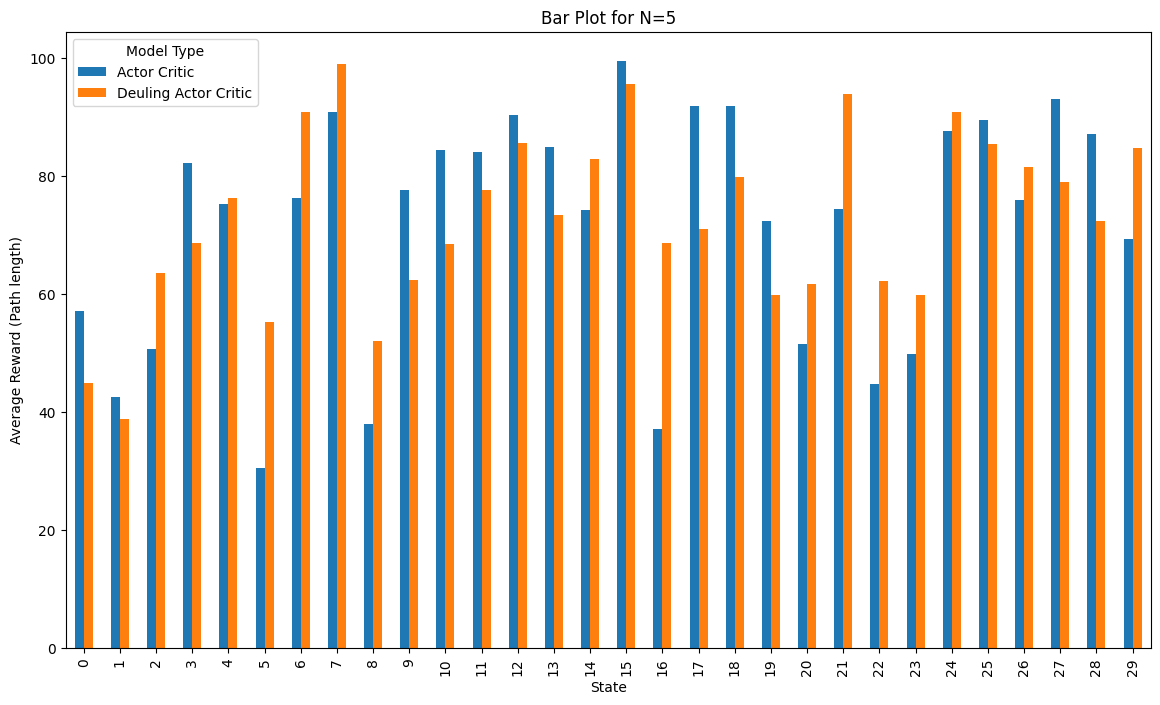

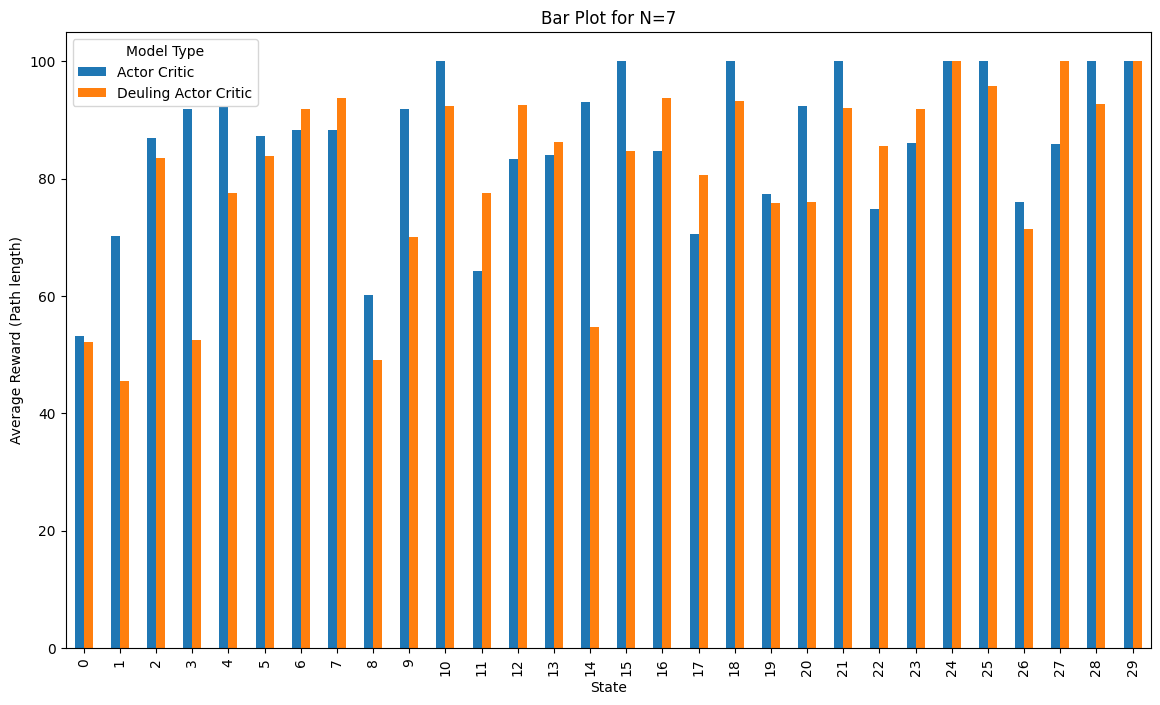

In [277]:

import matplotlib.pyplot as plt

df=df_
model_type_mapping= {
    '0': 'Actor Critic',
    '1': 'Deuling Actor Critic'
}

df['state'] = df['state'].astype(int)
df['model_Type'] = df['model_Type'].replace(model_type_mapping)
# Iterate over unique combinations of N to plot separate bar plots
unique_ns = df['N'].drop_duplicates()

for n in unique_ns:
    subset_df = df[df['N'] == n]
    
    grouped_df = subset_df.groupby(['state', 'model_Type'], as_index=False)['reward'].mean()
    
    pivot_df = grouped_df.pivot(index='state', columns='model_Type', values='reward')
    
    pivot_df.plot(kind='bar', figsize=(14, 8))
    plt.title(f'Bar Plot for N={n}')
    plt.xlabel('State')
    plt.ylabel('Average Reward (Path length)')
    plt.legend(title='Model Type')
    plt.show()


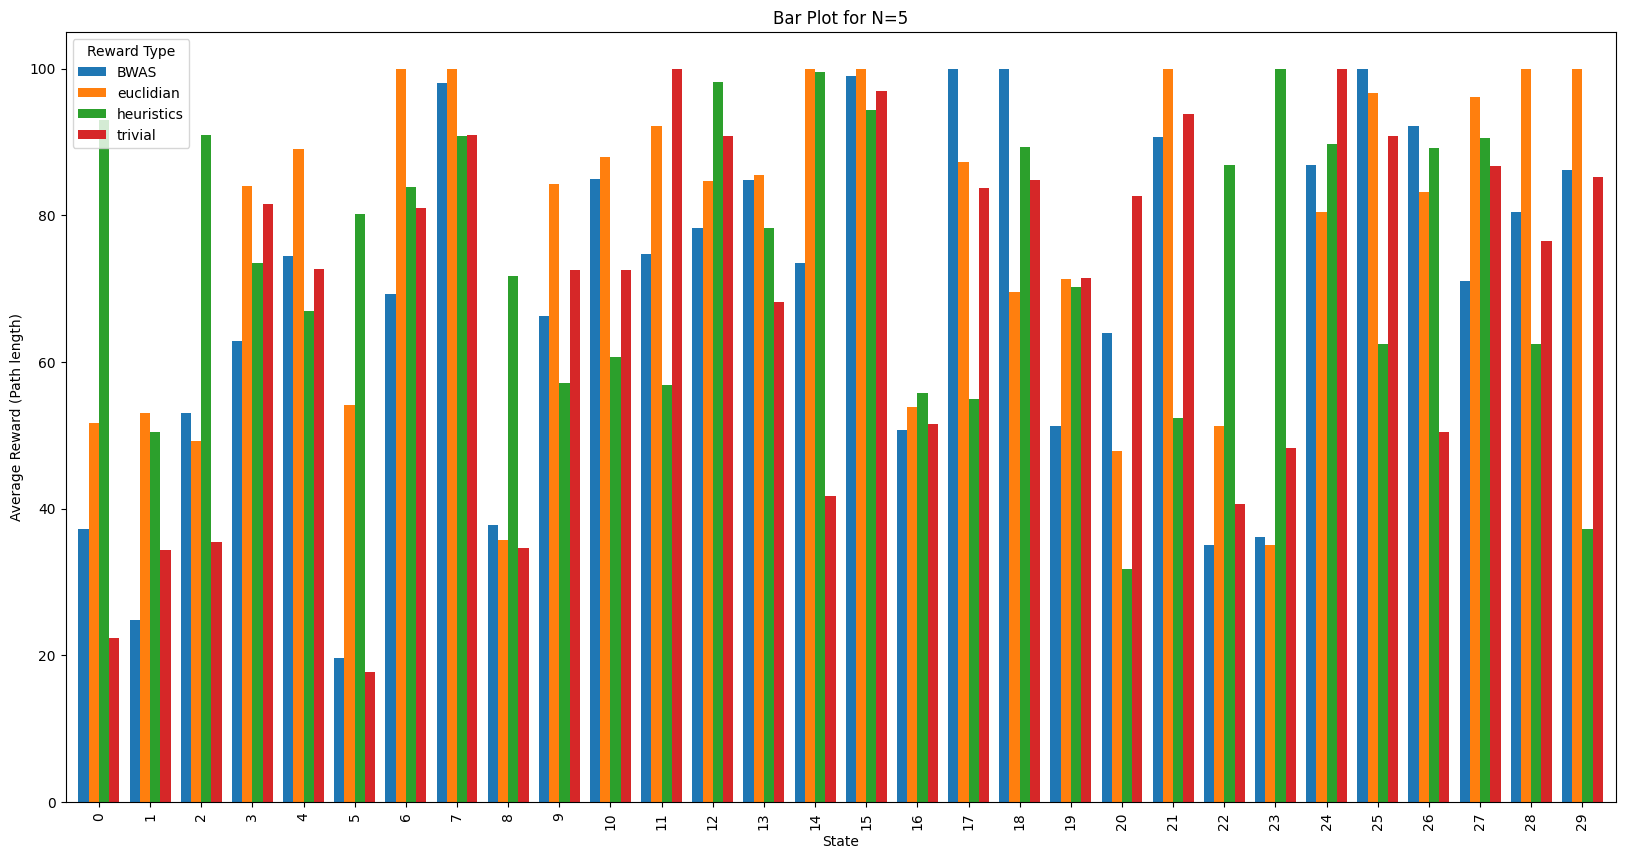

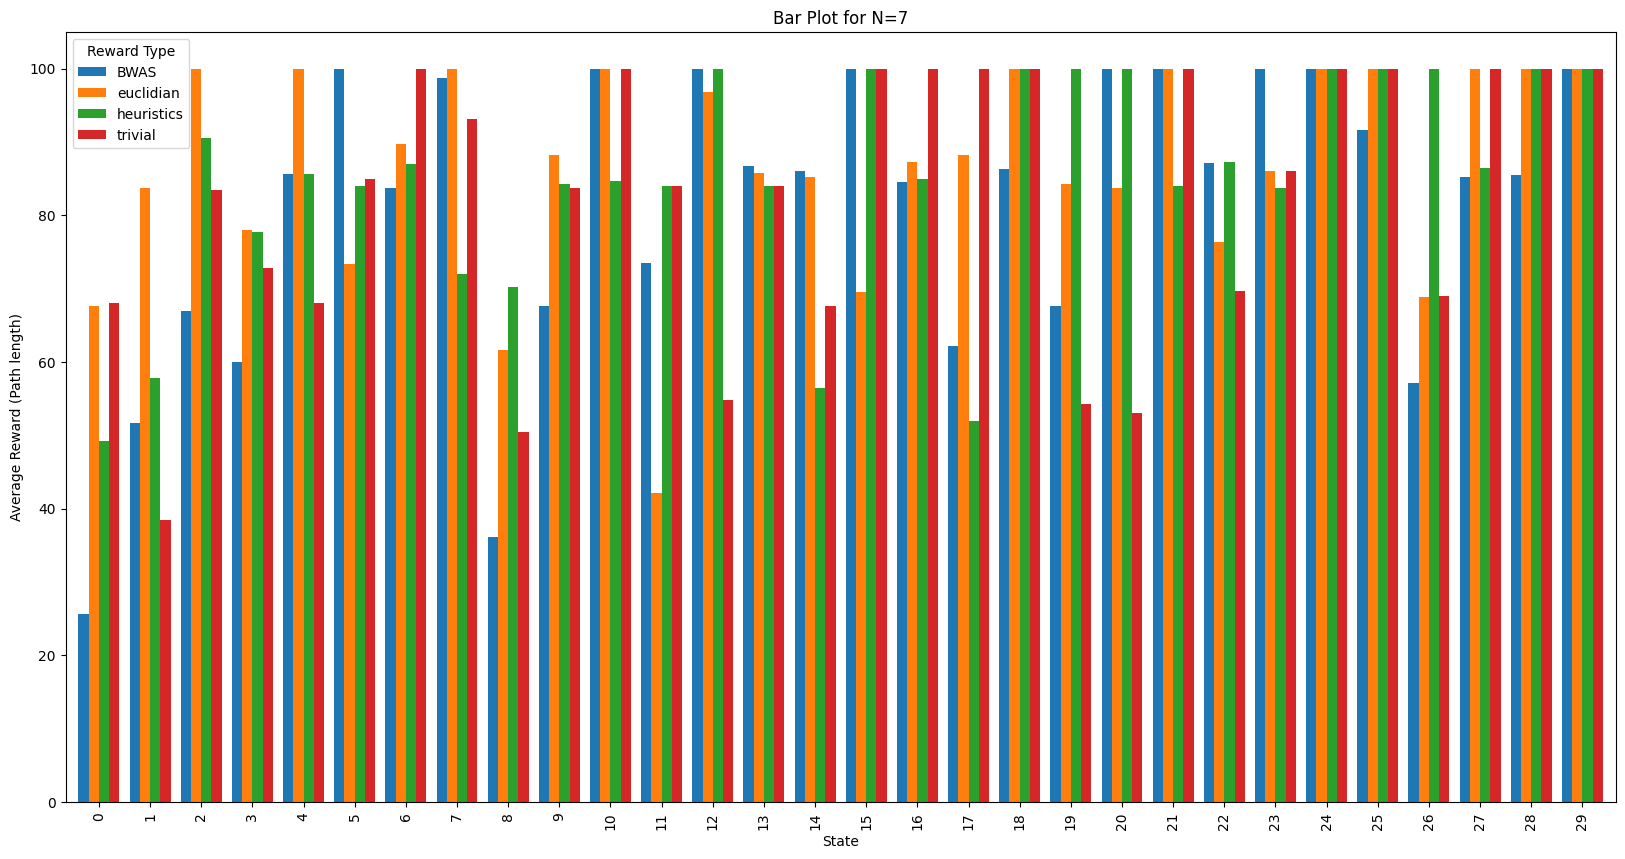

In [278]:
import matplotlib.pyplot as plt

df=df_
df['state'] = df['state'].astype(int)

reward_type_mapping = {
    '0': 'trivial',
    '1': 'euclidian',
    '2': 'BWAS',
    '3': 'heuristics'
}

df['Reward_type'] = df['Reward_type'].replace(reward_type_mapping)

unique_ns = df['N'].drop_duplicates()

for n in unique_ns:
    subset_df = df[df['N'] == n]
    
    grouped_df = subset_df.groupby(['state', 'Reward_type'], as_index=False)['reward'].mean()
    
    pivot_df = grouped_df.pivot(index='state', columns='Reward_type', values='reward')
    
    ax = pivot_df.plot(kind='bar', figsize=(20, 10), width=0.8)  # Adjust the width here
    plt.title(f'Bar Plot for N={n}')
    plt.xlabel('State')
    plt.ylabel('Average Reward (Path length)')
    plt.legend(title='Reward Type')
    plt.show()


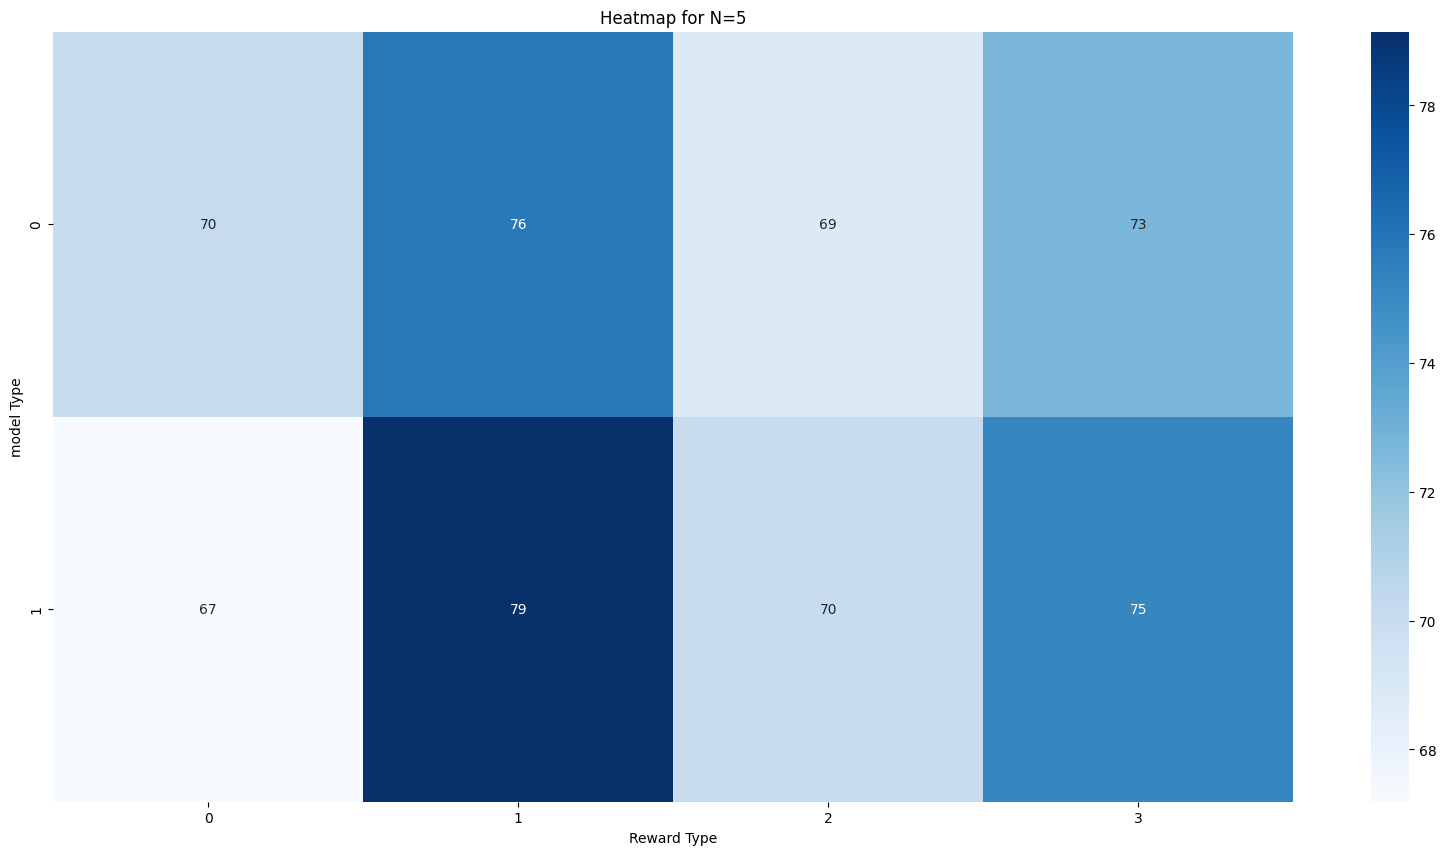

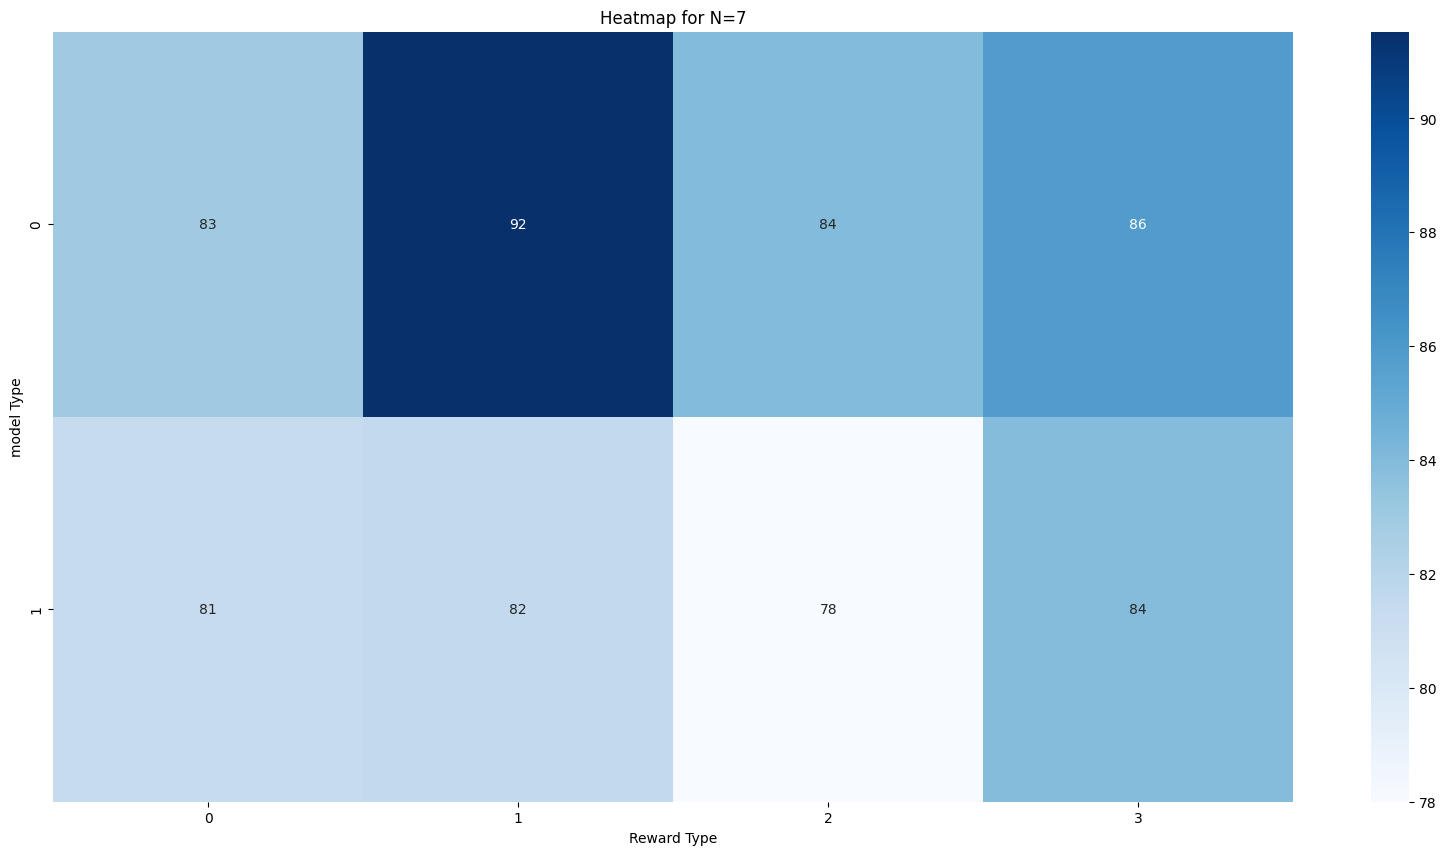

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

df=df_
df['state'] = df['state'].astype(int)

unique_combinations = df[['N']].drop_duplicates()

for _, row in unique_combinations.iterrows():
    n = row['N']
    
    subset_df = df[(df['N'] == n)]
    
    grouped_df = subset_df.groupby(['Reward_type', 'model_Type'], as_index=False)['reward'].mean()
    
    
    pivot_df = grouped_df.pivot(index='model_Type', columns='Reward_type', values='reward')
    
    plt.figure(figsize=(20, 10))
    sns.heatmap(pivot_df, annot=True, cmap="Blues", fmt=".0f")
    plt.title(f'Heatmap for N={n}')
    plt.xlabel('Reward Type')
    plt.ylabel('model Type')
    plt.show()

In [282]:
df_

,state,N,Reward_type,distance,model_Type,reward
0,0,5,0,10,0,100
1,1,5,0,10,0,1
2,2,5,0,10,0,2
3,3,5,0,10,0,100
4,4,5,0,10,0,80
...,...,...,...,...,...,...
1435,25,7,3,8,1,100
1436,26,7,3,8,1,100
1437,27,7,3,8,1,100
1438,28,7,3,8,1,100
